<a href="https://colab.research.google.com/github/OlyaSto/Olyabmstu/blob/master/%D0%A2%D0%9C%D0%9E/%D0%9B%D0%A02/LR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используем датасет переписи населения города Бихар в 2011 году. 
Он содержит следующие данные: 
*   Уникальный идентефикатор человека
*   Является ли человек женщиной? 0 - нет, 1 - да
*   Является ли человек взрослым? 0 - нет, 1 - да
*   Возраст
*   Рост
*   Вес

Подключение библиотек:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Монтирование Google Drive для получения доступа к данным, лежащим на нем:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка данных:

In [4]:
filename = '/content/drive/MyDrive/bihar.csv'

In [5]:
df = pd.read_csv(filename, sep=',')

Размер датасета:

In [6]:
df.shape

(39553, 6)

Колонки датасета:

In [7]:
df.columns

Index(['personid', 'female', 'adult', 'age', 'height_cm', 'weight_kg'], dtype='object')

Типы колонок:

In [8]:
df.dtypes

personid       int64
female       float64
adult        float64
age          float64
height_cm    float64
weight_kg    float64
dtype: object

Проверка пропущенных значений:

In [9]:
df.isnull().sum()

personid        0
female          1
adult          14
age            14
height_cm    6415
weight_kg    6063
dtype: int64

Первые 5 строк датасета:

In [10]:
df.head()

,personid,female,adult,age,height_cm,weight_kg
0,11010101,0.0,1.0,70.0,164.1,48.9
1,11010102,0.0,1.0,32.0,157.3,44.0
2,11010103,1.0,1.0,28.0,150.3,37.7
3,11010104,0.0,0.0,12.0,146.2,30.7
4,11010105,1.0,0.0,11.0,135.1,30.2


Всего строк:

In [11]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 39553


### Обработка пропусков в числовых данных

С помощью цикла по колонкам датасета выберем колонки с пропущенными значениями:

In [12]:
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка female. Тип данных float64. Количество пустых значений 1, 0.0%.
Колонка adult. Тип данных float64. Количество пустых значений 14, 0.04%.
Колонка age. Тип данных float64. Количество пустых значений 14, 0.04%.
Колонка height_cm. Тип данных float64. Количество пустых значений 6415, 16.22%.
Колонка weight_kg. Тип данных float64. Количество пустых значений 6063, 15.33%.


Возьмем только колонки с пропущенными значениями:

In [13]:
df_num = df[num_cols]
df_num

,female,adult,age,height_cm,weight_kg
0,0.0,1.0,70.0,164.1,48.9
1,0.0,1.0,32.0,157.3,44.0
2,1.0,1.0,28.0,150.3,37.7
3,0.0,0.0,12.0,146.2,30.7
4,1.0,0.0,11.0,135.1,30.2
...,...,...,...,...,...
39548,0.0,1.0,38.0,156.1,60.7
39549,1.0,1.0,28.0,148.9,46.7
39550,1.0,0.0,7.0,116.3,17.7
39551,0.0,0.0,6.0,101.5,13.4


Гистограмма по признакам:

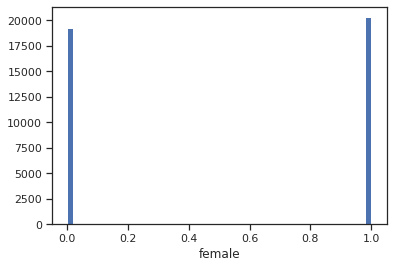

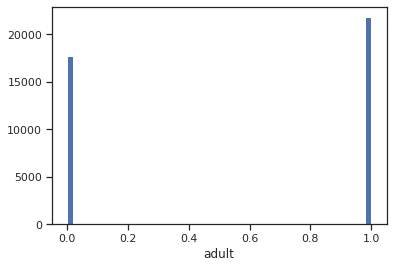

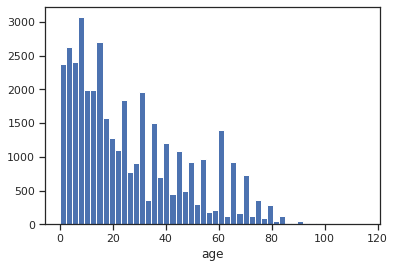

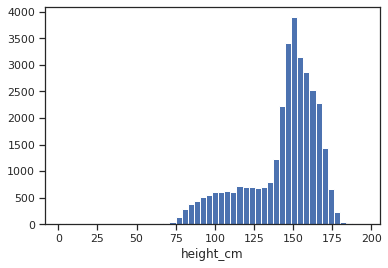

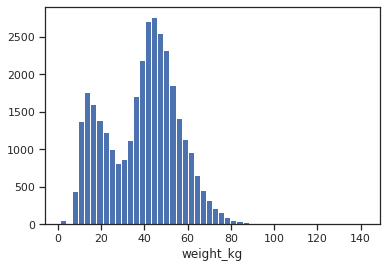

In [14]:
# Гистограмма по признакам
for col in df_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

In [15]:
df_fem = df_num[['female']]
df_fem.head()

,female
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(df_fem)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [18]:
strategies=['mean', 'median', 'most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(df_fem)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean', array([0.51357706]))

In [21]:
strategies[1], test_num_impute(strategies[1])

('median', array([1.]))

In [22]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([1.]))

In [23]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [24]:
df[['age']].describe()

,age
count,39539.000000
mean,26.286468
std,21.170421
min,0.000000
25%,9.000000
50%,20.000000
75%,40.000000
max,115.000000


In [25]:
test_num_impute_col(df, 'age', strategies[0])

('age', 'mean', 14, 26.286467564159437, 26.286467564159437)

In [26]:
test_num_impute_col(df, 'age', strategies[1])

('age', 'median', 14, 20.0, 20.0)

In [27]:
test_num_impute_col(df, 'age', strategies[2])

('age', 'most_frequent', 14, 8.0, 8.0)

### Обработка пропусков в категориальных данных

In [60]:
filename1 = '/content/drive/MyDrive/titles.csv'

In [61]:
cr = pd.read_csv(filename1, sep=',')

In [62]:
df.shape

(39553, 6)

In [63]:
cr.dtypes

code           object
title          object
section        object
class         float64
subclass       object
group         float64
main_group    float64
dtype: object

In [64]:
cr.isnull().sum()

code            0
title           0
section         0
class           9
subclass      145
group         819
main_group    819
dtype: int64

In [65]:
cr.head()

,code,title,section,class,subclass,group,main_group
0,A,HUMAN NECESSITIES,A,NaN,NaN,NaN,NaN
1,A01,AGRICULTURE; FORESTRY; ANIMAL HUSBANDRY; HUNTI...,A,1.0,NaN,NaN,NaN
2,A01B,SOIL WORKING IN AGRICULTURE OR FORESTRY; PARTS...,A,1.0,B,NaN,NaN
3,A01B1/00,Hand tools (edge trimmers for lawns A01G3/06 ...,A,1.0,B,1.0,0.0
4,A01B1/02,Spades; Shovels {(hand-operated dredgers E02F3...,A,1.0,B,1.0,2.0


С помощью цикла по колонкам выберем категориальные колонки с пропущенными значениями:

In [67]:
cr_cols = []
for col in cr.columns:
    # Количество пустых значений 
    temp_null_count = cr[cr[col].isnull()].shape[0]
    dt = str(cr[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cr_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка subclass. Тип данных object. Количество пустых значений 145, 0.37%.


In [69]:
cat_temp_data = cr[['subclass']]
cat_temp_data.head()

,subclass
0,NaN
1,NaN
2,B
3,B
4,B


In [71]:
cat_temp_data['subclass'].unique()

array([nan, 'B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P',
       'V', 'Y', 'Q', 'Z', 'R', 'S', 'T', 'W', 'A', 'E'], dtype=object)

In [73]:
cat_temp_data[cat_temp_data['subclass'].isnull()].shape

(145, 1)

In [74]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['B'],
       ['B'],
       ['B'],
       ...,
       ['T'],
       ['T'],
       ['T']], dtype=object)

In [75]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N',
       'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'Z'], dtype=object)

In [76]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['NA'],
       ['NA'],
       ['B'],
       ...,
       ['T'],
       ['T'],
       ['T']], dtype=object)

In [78]:
np.unique(data_imp3)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N',
       'NA', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'Z'], dtype=object)

In [79]:
data_imp3[data_imp3=='NA'].size

145

### Преобразование категориальных признаков в числовые

In [80]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,B
1,B
2,B
3,B
4,B
...,...
260471,T
260472,T
260473,T
260474,T


Кодирование категорий целочисленными значениями (label encoding)

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
cat_enc['c1'].unique()

array(['B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'V',
       'Y', 'Q', 'Z', 'R', 'S', 'T', 'W', 'A', 'E'], dtype=object)

In [83]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [84]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N',
       'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'Z'], dtype=object)

In [85]:
cat_enc_le

array([ 1,  1,  1, ..., 17, 17, 17])

In [86]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [87]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N',
       'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'Z'], dtype=object)

### Масштабирование данных

MinMax масштабирование

In [88]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [89]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['weight_kg']])

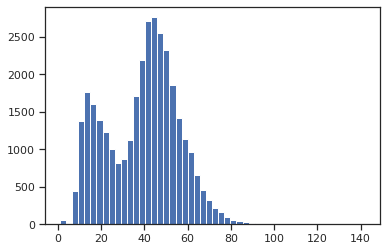

In [90]:
plt.hist(df['weight_kg'], 50)
plt.show()

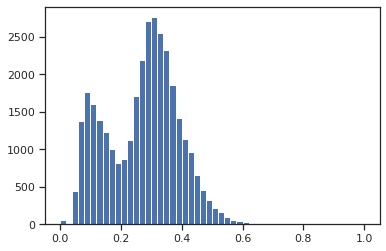

In [91]:
plt.hist(sc1_data, 50)
plt.show()

Масштабирование данных на основе Z-оценки

In [92]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(df[['weight_kg']])

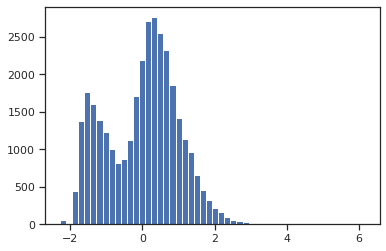

In [93]:
plt.hist(sc2_data, 50)
plt.show()